In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv('/content/drive/MyDrive/KT_Aivle_School/Data/Contest/AISPARK_4th/train_data.csv')
test = pd.read_csv('/content/drive/MyDrive/KT_Aivle_School/Data/Contest/AISPARK_4th/test_data.csv')

In [5]:
hp_dict = {0:0, 1:1, 2:2, 3:3, 4:4, 5:4, 6:0, 7:4}

train['HP'] = train['type'].map(hp_dict)
test['HP'] = test['type'].map(hp_dict)

In [6]:
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((data > upper_bound) | (data < lower_bound))

In [7]:
train.columns

Index(['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current',
       'motor_rpm', 'motor_temp', 'motor_vibe', 'type', 'HP'],
      dtype='object')

In [8]:
# train.drop(['air_end_temp', 'out_pressure', 'motor_current', 'motor_temp', 'motor_vibe'], axis=1, inplace=True)
# test.drop(['air_end_temp', 'out_pressure', 'motor_current', 'motor_temp', 'motor_vibe'], axis=1, inplace=True)

In [9]:
train_00 = train.loc[train['HP'] == 0].reset_index(drop=True)
train_01 = train.loc[train['HP'] == 1].reset_index(drop=True)
train_02 = train.loc[train['HP'] == 2].reset_index(drop=True)
train_03 = train.loc[train['HP'] == 3].reset_index(drop=True)
train_04 = train.loc[train['HP'] == 4].reset_index(drop=True)

test_00 = test.loc[test['HP'] == 0]
test_01 = test.loc[test['HP'] == 1]
test_02 = test.loc[test['HP'] == 2]
test_03 = test.loc[test['HP'] == 3]
test_04 = test.loc[test['HP'] == 4]

In [10]:
motor_vibe_0_outlier_index = outliers_iqr(train_00['motor_vibe'])[0]
motor_vibe_1_outlier_index = outliers_iqr(train_01['motor_vibe'])[0]
motor_vibe_2_outlier_index = outliers_iqr(train_02['motor_vibe'])[0]
motor_vibe_3_outlier_index = outliers_iqr(train_03['motor_vibe'])[0]
motor_vibe_4_outlier_index = outliers_iqr(train_04['motor_vibe'])[0]
motor_vibe_0_outlier_index, motor_vibe_1_outlier_index, motor_vibe_2_outlier_index, motor_vibe_3_outlier_index, motor_vibe_4_outlier_index

(array([], dtype=int64),
 array([149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
        162, 163, 164]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64))

In [11]:
train_01

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,HP
0,1.73,55.16,0.7,25.60,2973.0,71.03,3.45,1,1
1,1.31,46.05,0.7,19.32,2244.0,62.93,3.05,1,1
2,1.33,46.59,0.7,19.69,2287.0,63.41,3.07,1,1
3,1.87,58.00,0.7,27.56,3200.0,73.56,3.58,1,1
4,1.68,53.98,0.7,24.78,2878.0,69.98,3.40,1,1
...,...,...,...,...,...,...,...,...,...
364,0.72,33.33,0.7,10.56,1226.0,51.62,2.48,1,1
365,0.86,36.41,0.7,12.68,1473.0,54.37,2.62,1,1
366,0.83,35.88,0.7,12.31,1430.0,53.89,2.59,1,1
367,1.77,55.85,0.7,26.07,3028.0,71.64,3.48,1,1


In [12]:
print(train_01.shape)
train_01.drop(motor_vibe_1_outlier_index, axis=0, inplace=True)
train_01.reset_index(drop=True, inplace=True)
print(train_01.shape)

(369, 9)
(353, 9)


In [13]:
train_01['motor_vibe'].describe()

count    353.000000
mean       3.116516
std        0.375935
min        2.470000
25%        2.800000
50%        3.110000
75%        3.420000
max        3.880000
Name: motor_vibe, dtype: float64

In [14]:
cols = [n for n in train.columns if n != 'type' and n != 'HP' and n != 'type_HP' and n != 'out_pressure']
print(cols)
train_datas = [train_00, train_01, train_02, train_03, train_04]
test_datas = [test_00,test_01,test_02,test_03,test_04]

nt,coefs,incpts=[],[],[]
for n in range(len(cols) - 1):
    for m in range(n + 1, len(cols)):
        print(cols[n], cols[n+1])
        df_linear = pd.DataFrame(columns=['new_type','coef','intercept'])
        for i,df in enumerate(train_datas):
            coef, intercept = np.polyfit(df[cols[n]], df[cols[m]], 1)
            df[f'{cols[n]}_{cols[m]}'] = df[cols[m]] - coef*df[cols[n]] - intercept
            print(f'x_train_{i}의 선형관계: y = {coef}x + {intercept}')
            nt.append(i)
            coefs.append(coef)
            incpts.append(intercept)
        df_linear['new_type'] = nt
        df_linear['coef'] = coefs
        df_linear['intercept'] = incpts
        # df_linear.head()

        for i,df in enumerate(test_datas):
            coef,intercept = df_linear.loc[i,'coef'], df_linear.loc[i,'intercept']
            df[f'{cols[n]}_{cols[m]}'] = df[cols[m]] - coef*df[cols[n]] - intercept

['air_inflow', 'air_end_temp', 'motor_current', 'motor_rpm', 'motor_temp', 'motor_vibe']
air_inflow air_end_temp
x_train_0의 선형관계: y = 13.233119248102218x + 20.00578335310425
x_train_1의 선형관계: y = 21.283704660771203x + 18.164449860988423
x_train_2의 선형관계: y = 45.072493839690196x + 16.952347292707586
x_train_3의 선형관계: y = 7.142935204608351x + 20.50105318502551
x_train_4의 선형관계: y = 13.231713386568524x + 20.006650198228257
air_inflow air_end_temp
x_train_0의 선형관계: y = 12.939429267859957x + 0.0039693061623375745
x_train_1의 선형관계: y = 14.71634858637448x + 0.03496681986568461
x_train_2의 선형관계: y = 16.025687964967528x + -0.01711598738309135
x_train_3의 선형관계: y = 11.620168045041716x + -0.15436471000170898
x_train_4의 선형관계: y = 12.937868229703765x + 0.004830062134211498
air_inflow air_end_temp
x_train_0의 선형관계: y = 1058.672400311043x + 0.32632173326865754
x_train_1의 선형관계: y = 1699.4272068368803x + 10.288210586314587
x_train_2의 선형관계: y = 3605.7942326359403x + -3.902792191665739
x_train_3의 선형관계: y = 571.42

In [15]:
train_00

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,HP,air_inflow_air_end_temp,...,air_end_temp_motor_current,air_end_temp_motor_rpm,air_end_temp_motor_temp,air_end_temp_motor_vibe,motor_current_motor_rpm,motor_current_motor_temp,motor_current_motor_vibe,motor_rpm_motor_temp,motor_rpm_motor_vibe,motor_temp_motor_vibe
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0,0,-0.046443,...,-0.002250,0.100084,0.004461,-0.003393,0.284073,0.006505,-0.003291,0.003349,-0.003448,-0.003616
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0,0,-0.028148,...,-0.006551,-0.331506,-0.004947,0.004266,0.204585,0.001010,0.004564,-0.001263,0.004451,0.004514
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0,0,0.008959,...,0.002961,-0.107330,0.001006,-0.004035,-0.349606,-0.001686,-0.004170,0.002198,-0.003975,-0.004085
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0,0,-0.038276,...,-0.002990,-0.317767,-0.008055,-0.002445,-0.073108,-0.005336,-0.002309,-0.004524,-0.002269,-0.002043
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0,0,0.061290,...,0.001185,0.292809,0.002119,-0.000480,0.195797,0.001041,-0.000534,-0.001134,-0.000642,-0.000586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,2.52,53.36,0.7,32.62,2669.0,69.66,3.48,6,0,0.006756,...,0.002063,0.278724,0.007443,-0.002656,0.109982,0.005569,-0.002750,0.004347,-0.002811,-0.003028
677,3.02,59.94,0.7,39.05,3195.0,75.50,3.78,6,0,-0.029803,...,-0.001903,-0.132647,-0.001632,0.004937,0.023183,0.000100,0.005024,-0.000158,0.005010,0.005019
678,3.20,62.39,0.7,41.45,3391.0,77.68,3.88,6,0,0.038235,...,0.002471,-0.136881,0.000521,-0.003938,-0.338920,-0.001724,-0.004050,0.002042,-0.003862,-0.003964
679,2.21,49.21,0.7,28.56,2337.0,65.97,3.30,6,0,-0.040977,...,-0.000041,0.285896,0.006450,0.001765,0.289206,0.006487,0.001767,0.003273,0.001606,0.001443


['air_inflow_air_end_temp', 'air_inflow_motor_current', 'air_inflow_motor_rpm', 'air_inflow_motor_temp', 'air_inflow_motor_vibe', 'air_end_temp_motor_current', 'air_end_temp_motor_rpm', 'air_end_temp_motor_temp', 'air_end_temp_motor_vibe', 'motor_current_motor_rpm', 'motor_current_motor_temp', 'motor_current_motor_vibe', 'motor_rpm_motor_temp', 'motor_rpm_motor_vibe', 'motor_temp_motor_vibe']


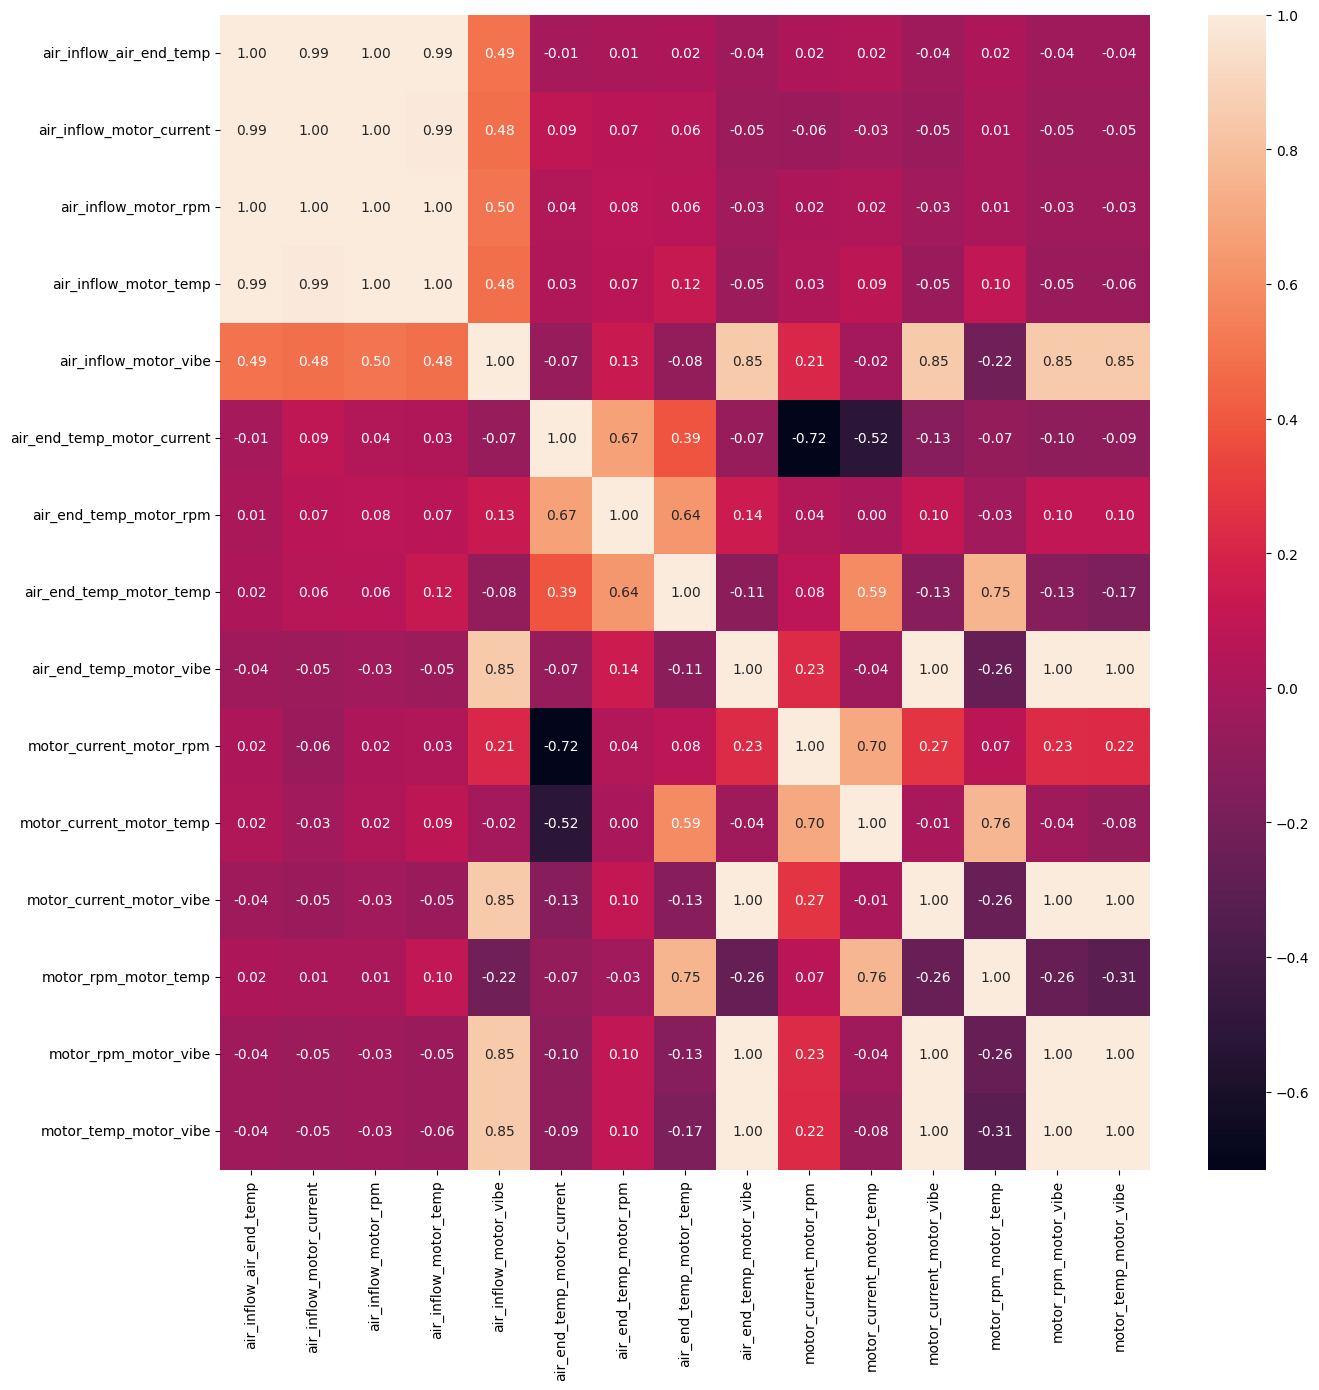

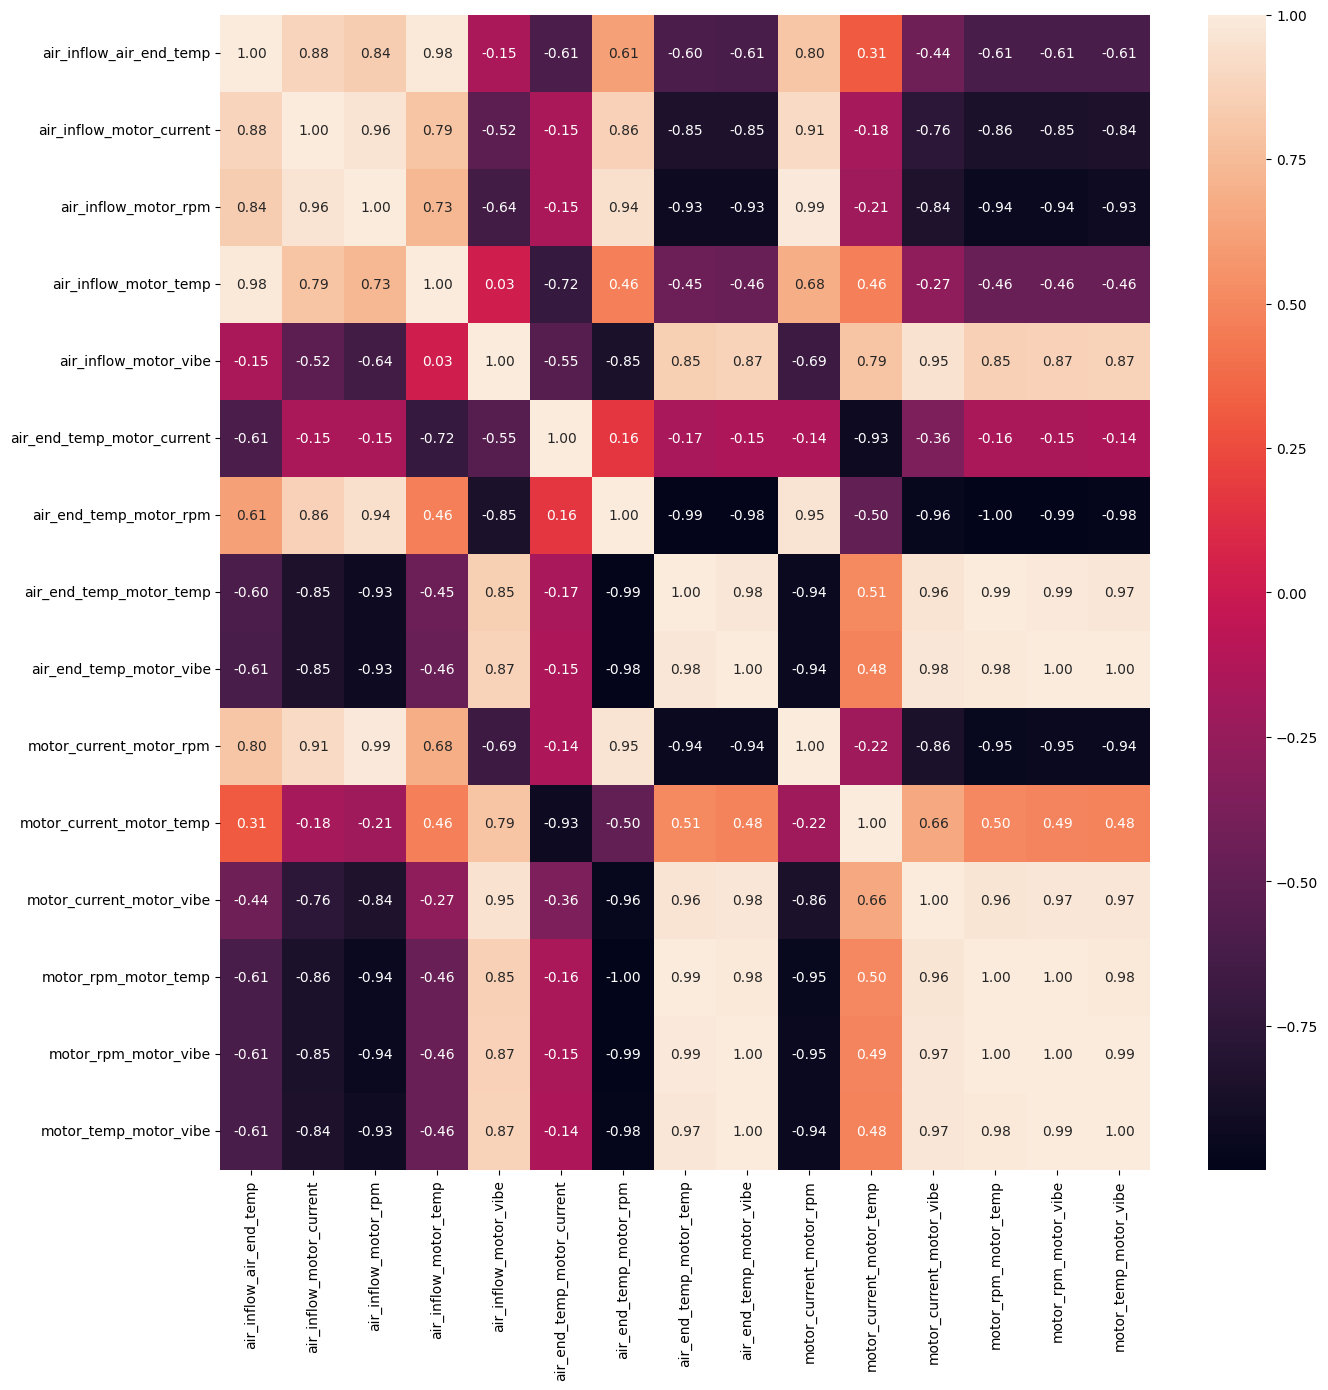

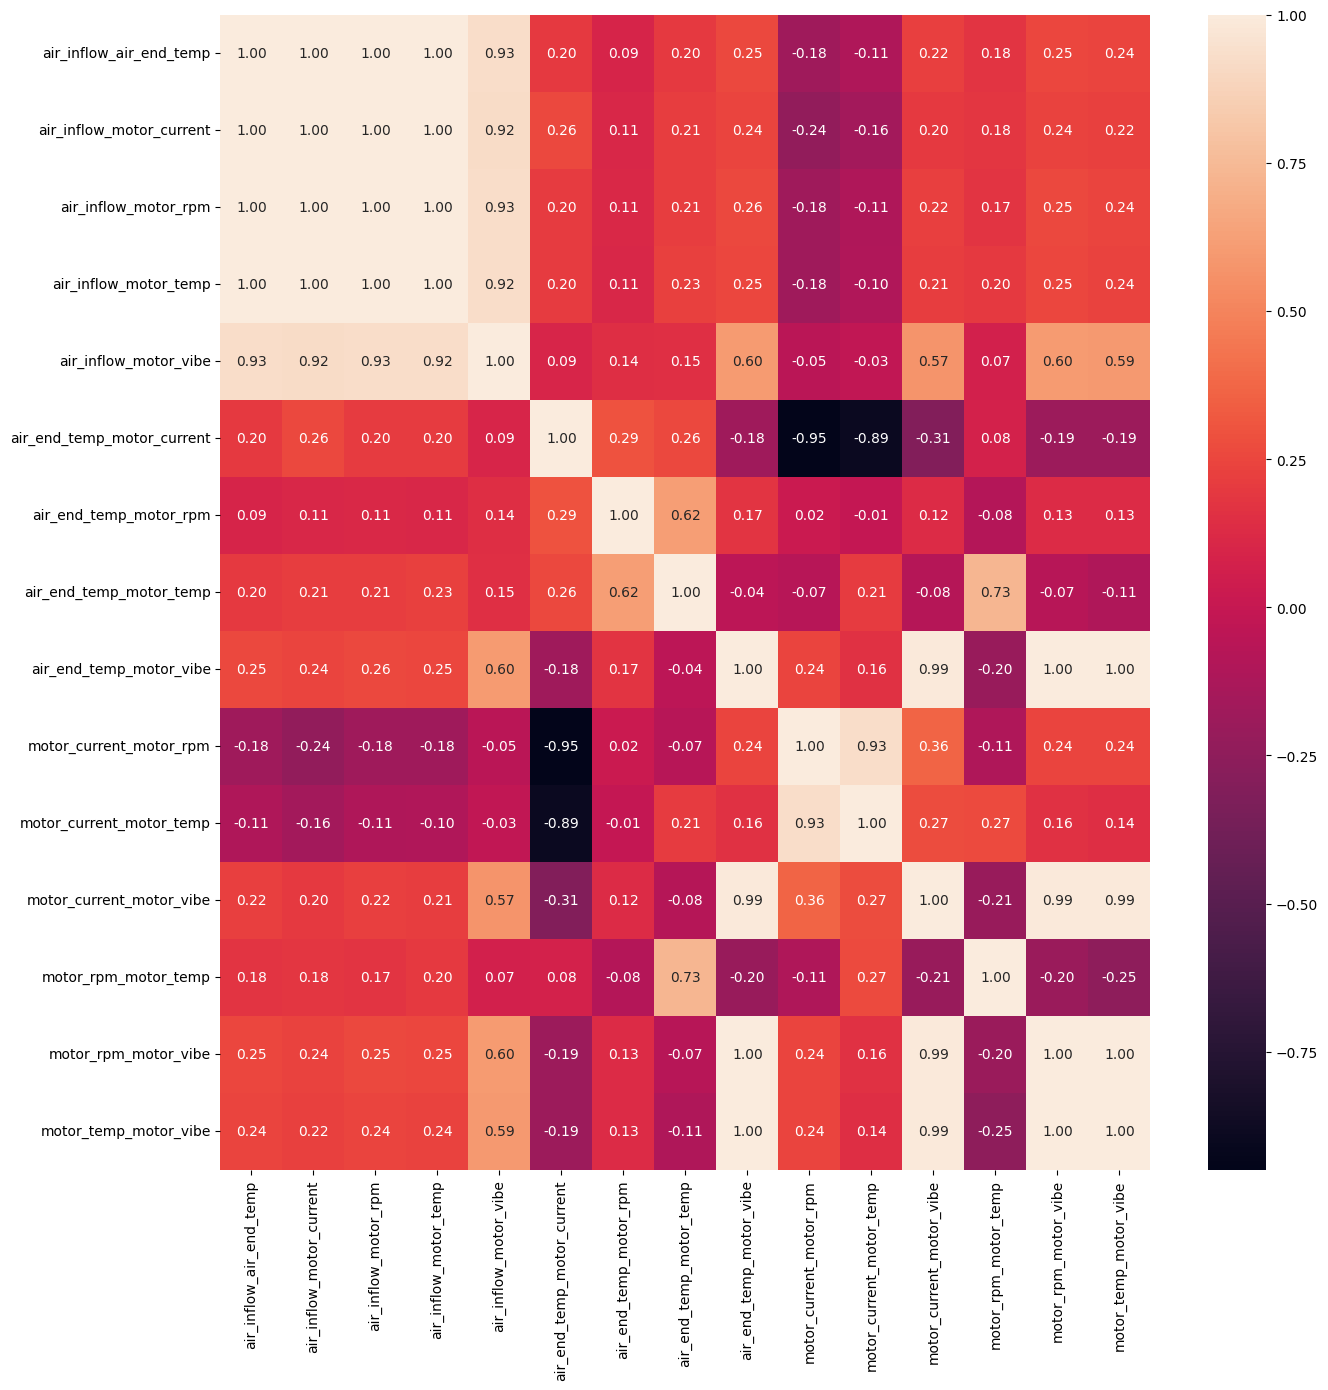

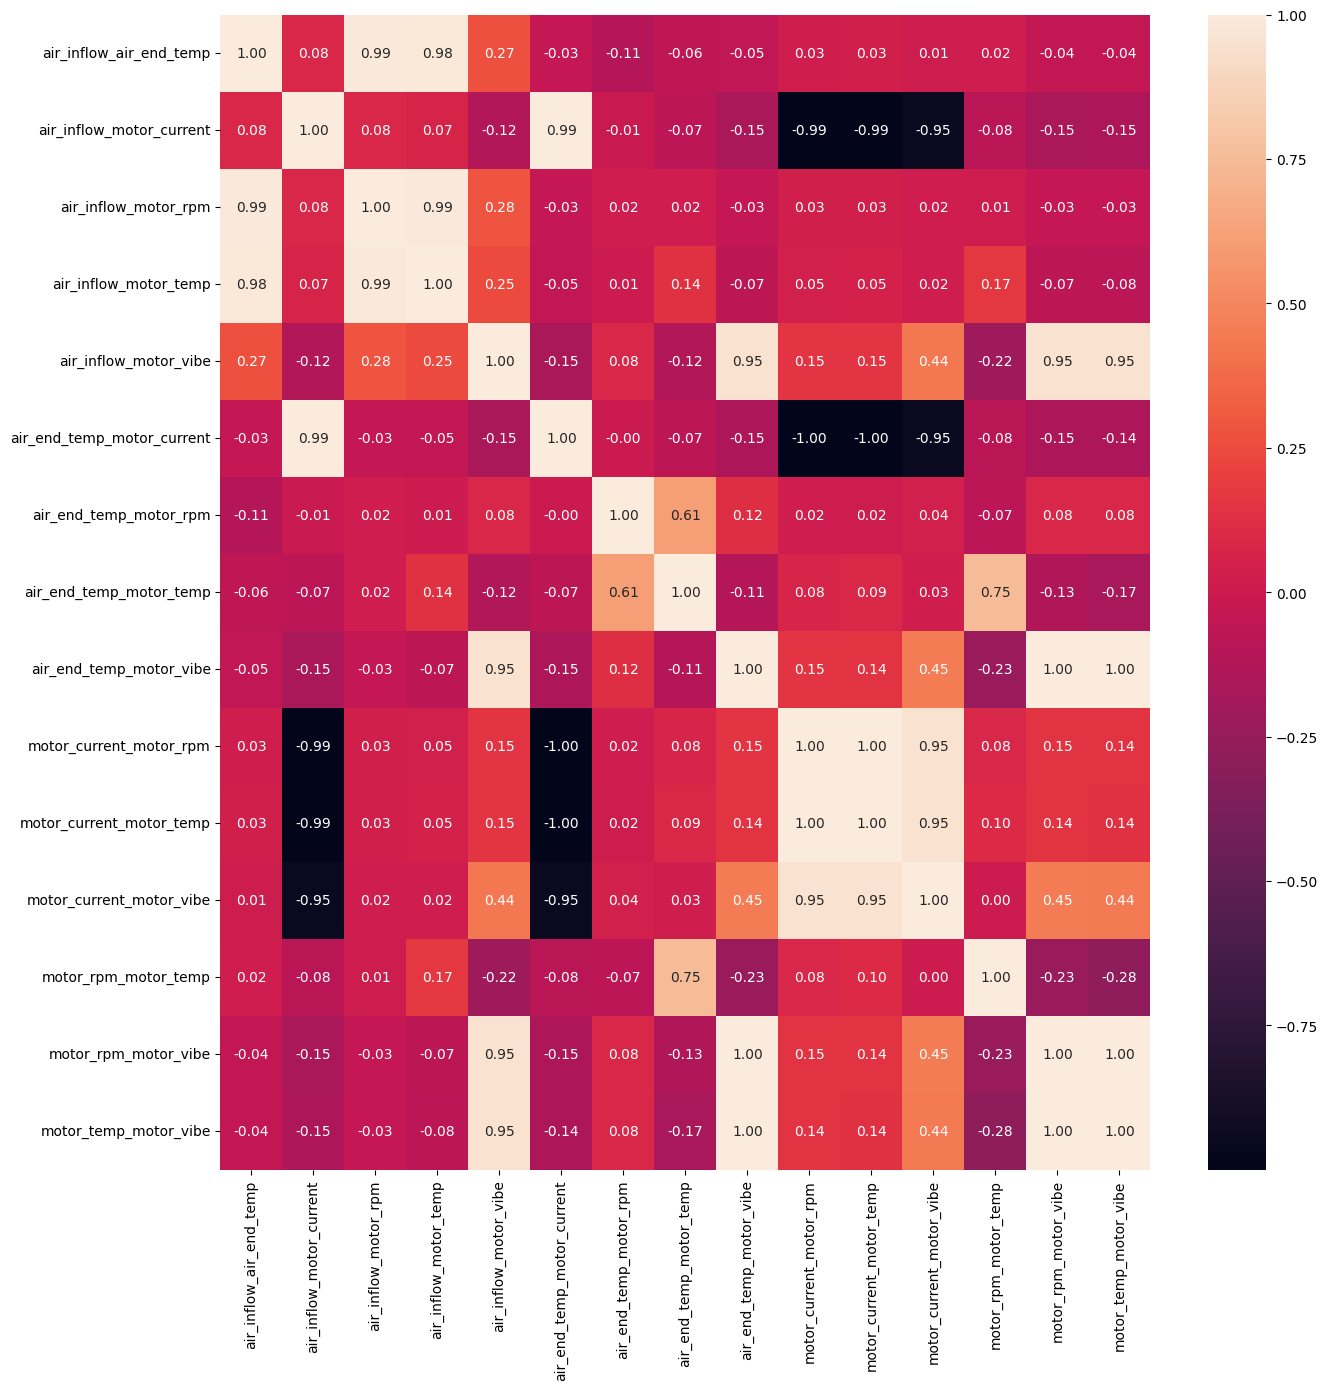

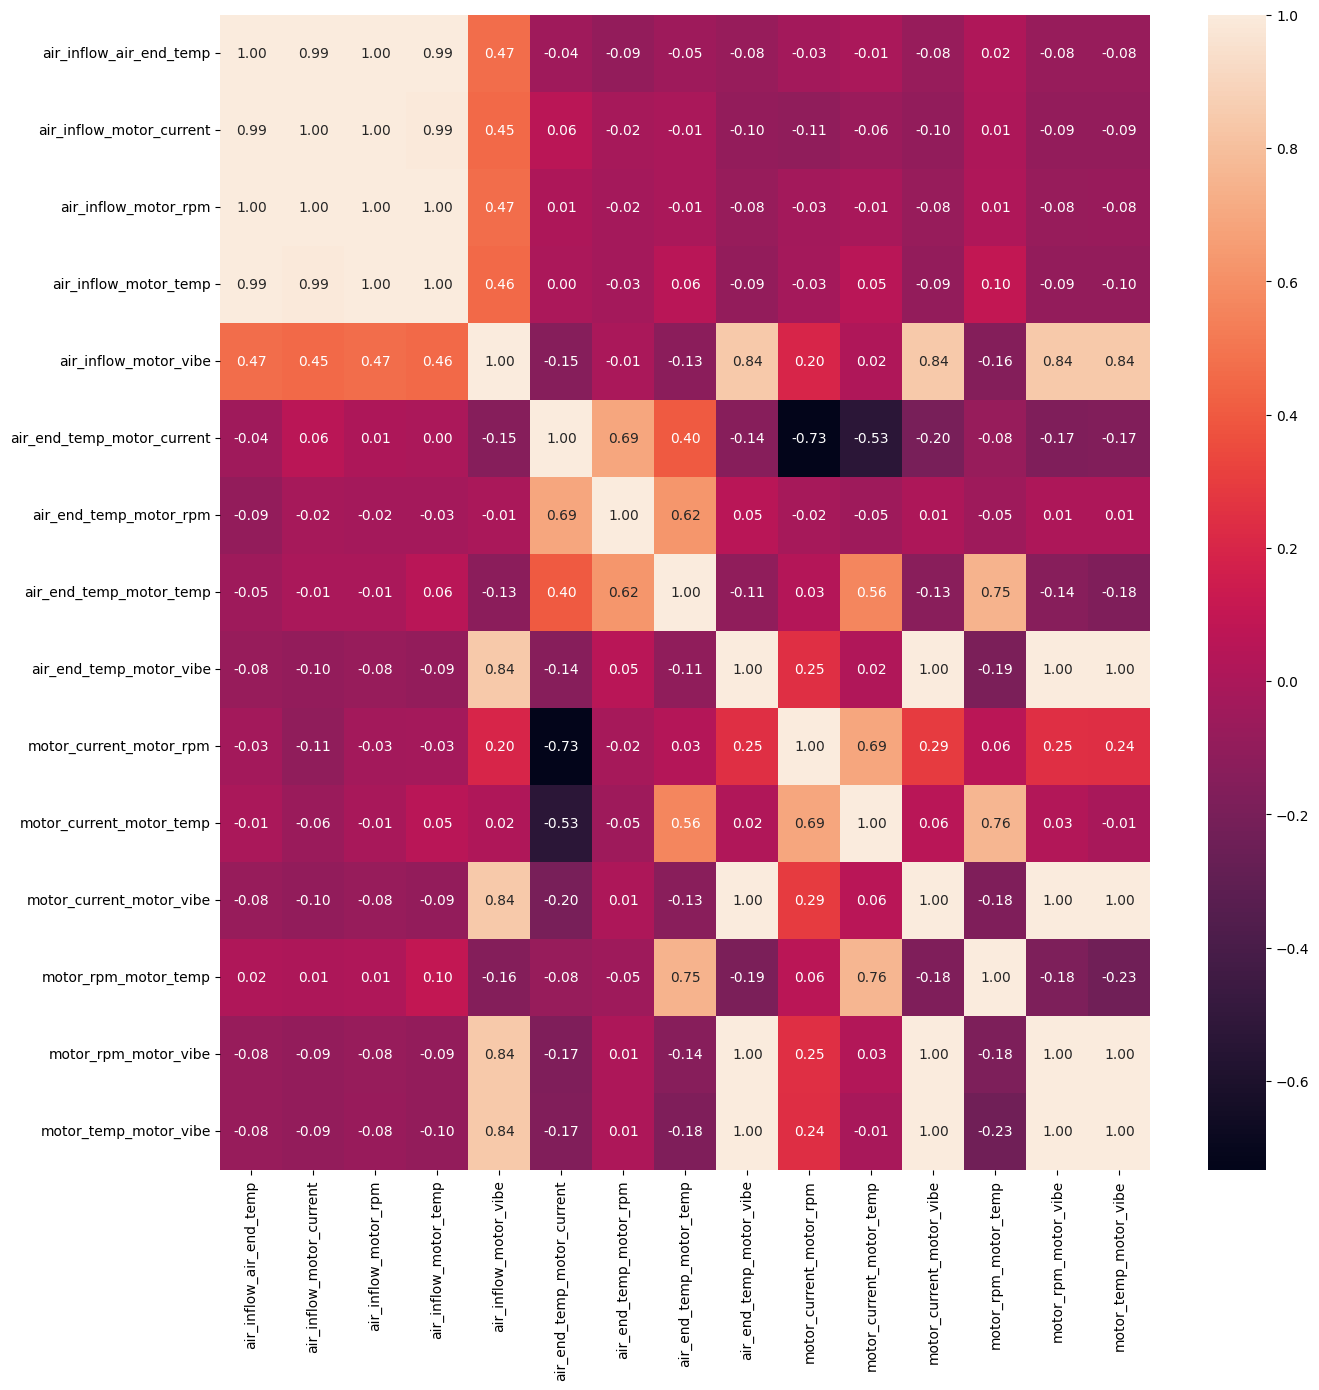

In [16]:
i_cols = [n for n in train_00.columns if n not in train.columns and n != 'type' and n != 'HP' and n != 'type_HP' and n != 'out_pressure']
print(i_cols)
plt.figure(figsize=(15,15))
sns.heatmap(train_00[i_cols].corr(), annot=True, fmt='.2f')
plt.show()
plt.figure(figsize=(15,15))
sns.heatmap(train_01[i_cols].corr(), annot=True, fmt='.2f')
plt.show()
plt.figure(figsize=(15,15))
sns.heatmap(train_02[i_cols].corr(), annot=True, fmt='.2f')
plt.show()
plt.figure(figsize=(15,15))
sns.heatmap(train_03[i_cols].corr(), annot=True, fmt='.2f')
plt.show()
plt.figure(figsize=(15,15))
sns.heatmap(train_04[i_cols].corr(), annot=True, fmt='.2f')
plt.show()

In [49]:

tmp = train_00[i_cols].corr()
# display(tmp)

cal_corr_df = pd.DataFrame(index=['mean', 'max', 'min', 'max-min'])
for i in range(len(i_cols)):
    list_corr = []
    cal_corr_df[i_cols[i]] = np.nan
    for j in range(len(i_cols)):
        if i != j:
            list_corr.append(tmp.iat[i, j])
    list_corr = list(map(abs, list_corr))
    # print('*' * 15, f'{i_cols[i]}', '*' * 15)
    # print(f'평균: {sum(list_corr) / len(list_corr)}')
    cal_corr_df[i_cols[i]]['mean'] = sum(list_corr) / len(list_corr)
    # print(f'최대: {max(list_corr)}')
    cal_corr_df[i_cols[i]]['max'] = max(list_corr)
    # print(f'최소: {min(list_corr)}')
    cal_corr_df[i_cols[i]]['min'] = max(list_corr)
    # print(f'최대-최소: {max(list_corr) - min(list_corr)}')
    cal_corr_df[i_cols[i]]['max-min'] = max(list_corr) - min(list_corr)
    # print()
display(cal_corr_df)

,air_inflow_air_end_temp,air_inflow_motor_current,air_inflow_motor_rpm,air_inflow_motor_temp,air_inflow_motor_vibe,air_end_temp_motor_current,air_end_temp_motor_rpm,air_end_temp_motor_temp,air_end_temp_motor_vibe,motor_current_motor_rpm,motor_current_motor_temp,motor_current_motor_vibe,motor_rpm_motor_temp,motor_rpm_motor_vibe,motor_temp_motor_vibe
air_inflow_air_end_temp,1.000000,0.994722,0.997419,0.994108,0.491680,-0.008807,0.005170,0.016483,-0.040001,0.016766,0.023019,-0.039206,0.016929,-0.040443,-0.040716
air_inflow_motor_current,0.994722,1.000000,0.997108,0.993166,0.482784,0.093838,0.074126,0.056105,-0.047021,-0.056754,-0.030097,-0.052533,0.009379,-0.050517,-0.050263
air_inflow_motor_rpm,0.997419,0.997108,1.000000,0.996489,0.499480,0.039487,0.076953,0.062069,-0.029492,0.019283,0.023045,-0.031751,0.014688,-0.033018,-0.033284
air_inflow_motor_temp,0.994108,0.993166,0.996489,1.000000,0.478790,0.033198,0.074033,0.124765,-0.051232,0.025018,0.086763,-0.052966,0.098351,-0.054747,-0.058927
air_inflow_motor_vibe,0.491680,0.482784,0.499480,0.478790,1.000000,-0.065741,0.128848,-0.084073,0.850411,0.210283,-0.020478,0.849168,-0.218808,0.849362,0.848190
air_end_temp_motor_current,-0.008807,0.093838,0.039487,0.033198,-0.065741,1.000000,0.672267,0.386851,-0.070116,-0.715808,-0.516685,-0.131556,-0.072863,-0.099901,-0.094782
air_end_temp_motor_rpm,0.005170,0.074126,0.076953,0.074033,0.128848,0.672267,1.000000,0.635593,0.144728,0.035741,0.001311,0.102225,-0.030508,0.101765,0.101842
air_end_temp_motor_temp,0.016483,0.056105,0.062069,0.124765,-0.084073,0.386851,0.635593,1.000000,-0.106431,0.077304,0.589635,-0.129704,0.752274,-0.134808,-0.170872
air_end_temp_motor_vibe,-0.040001,-0.047021,-0.029492,-0.051232,0.850411,-0.070116,0.144728,-0.106431,1.000000,0.231166,-0.037406,0.998093,-0.261307,0.999063,0.997883
motor_current_motor_rpm,0.016766,-0.056754,0.019283,0.025018,0.210283,-0.715808,0.035741,0.077304,0.231166,1.000000,0.698723,0.274015,0.069583,0.230849,0.224011


,air_inflow_air_end_temp,air_inflow_motor_current,air_inflow_motor_rpm,air_inflow_motor_temp,air_inflow_motor_vibe,air_end_temp_motor_current,air_end_temp_motor_rpm,air_end_temp_motor_temp,air_end_temp_motor_vibe,motor_current_motor_rpm,motor_current_motor_temp,motor_current_motor_vibe,motor_rpm_motor_temp,motor_rpm_motor_vibe,motor_temp_motor_vibe
mean,0.266105,0.284887,0.275255,0.294468,0.434150,0.214422,0.156079,0.237640,0.347454,0.206093,0.207710,0.351293,0.223690,0.349381,0.357205
max,0.997419,0.997108,0.997419,0.996489,0.850411,0.715808,0.672267,0.752274,0.999063,0.715808,0.762277,0.999005,0.762277,0.999063,0.998810
min,0.997419,0.997108,0.997419,0.996489,0.850411,0.715808,0.672267,0.752274,0.999063,0.715808,0.762277,0.999005,0.762277,0.999063,0.998810
max-min,0.992250,0.987730,0.982731,0.971471,0.829933,0.707001,0.670956,0.735791,0.969571,0.699041,0.760966,0.993804,0.752899,0.966045,0.965527


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
def isofr(train,test, new_type, only_abnormal=True, n_estimators=100, contamination=0.01):
    tmp = test.copy()
    # One-class SVM 알고리즘을 사용하여 이상치 탐지
    model = IsolationForest(n_estimators=n_estimators, max_samples='auto', contamination=contamination, random_state=33, verbose=1)
    model.fit(train)

    # 예측하기
    pred = model.predict(test)
    # 고장 = 1, 정상 = 0 으로 바꾸기
    fix_pred = [0 if i==1 else 1 for i in pred]
    print('전체 데이터 수:', len(fix_pred))
    print('고장 데이터 수: ', fix_pred.count(1))
    print('고장 데이터 비율: ', round(fix_pred.count(1)/len(fix_pred),4))
    tmp['abnorm'] = fix_pred

    # 시각화
    # xmin,xmax = tmp['air_inflow'].min()-1, tmp['air_inflow'].max()+1
    # if only_abnormal :
    #     sns.scatterplot(x='air_inflow', y='linear', data=tmp.loc[tmp['abnorm']==1])
    # else :
    #     sns.scatterplot(x='air_inflow', y='linear', data=tmp, hue = 'abnorm')
    # plt.title(f'Distribution of abnorm in f_x_train_0')
    # plt.xlim(xmin,xmax)
    # plt.ylim(tmp['linear'].min()-1,tmp['linear'].max()+1)
    # plt.hlines(xmin=xmin,xmax=xmax,y=0,color='red')
    # plt.hlines(xmin=xmin,xmax=xmax,y=df_linear.loc[new_type,'max'],color='green', linestyle='--')
    # plt.hlines(xmin=xmin,xmax=xmax,y=df_linear.loc[new_type,'min'],color='green', linestyle='--')
    # plt.show();
    return fix_pred

In [ ]:
f_x_data_0 = train_00.drop(['out_pressure', 'type', 'HP'], axis=1)
f_x_data_1 = train_01.drop(['out_pressure', 'type', 'HP'], axis=1)
f_x_data_2 = train_02.drop(['out_pressure', 'type', 'HP'], axis=1)
f_x_data_3 = train_03.drop(['out_pressure', 'type', 'HP'], axis=1)
f_x_data_4 = train_04.drop(['out_pressure', 'type', 'HP'], axis=1)

f_x_test_0 = test_00.drop(['out_pressure', 'type', 'HP'], axis=1)
f_x_test_1 = test_01.drop(['out_pressure', 'type', 'HP'], axis=1)
f_x_test_2 = test_02.drop(['out_pressure', 'type', 'HP'], axis=1)
f_x_test_3 = test_03.drop(['out_pressure', 'type', 'HP'], axis=1)
f_x_test_4 = test_04.drop(['out_pressure', 'type', 'HP'], axis=1)

In [ ]:
f_x_data_0

,air_inflow,air_end_temp,motor_current,motor_rpm,motor_temp,motor_vibe,air_inflow_air_end_temp,air_inflow_motor_current,air_inflow_motor_rpm,air_inflow_motor_temp,...,air_end_temp_motor_current,air_end_temp_motor_rpm,air_end_temp_motor_temp,air_end_temp_motor_vibe,motor_current_motor_rpm,motor_current_motor_temp,motor_current_motor_vibe,motor_rpm_motor_temp,motor_rpm_motor_vibe,motor_temp_motor_vibe
0,1.59,41.00,20.53,1680.0,58.67,2.93,-0.046443,-0.047662,-3.615438,-0.036824,...,-0.002250,0.100084,0.004461,-0.003393,0.284073,0.006505,-0.003291,0.003349,-0.003448,-0.003616
1,2.97,59.28,38.40,3142.0,74.91,3.75,-0.028148,-0.034074,-2.583351,-0.029967,...,-0.006551,-0.331506,-0.004947,0.004266,0.204585,0.001010,0.004564,-0.001263,0.004451,0.004514
2,1.91,45.29,24.73,2023.0,62.48,3.12,0.008959,0.011721,0.609394,0.008969,...,0.002961,-0.107330,0.001006,-0.004035,-0.349606,-0.001686,-0.004170,0.002198,-0.003975,-0.004085
3,2.37,51.33,30.63,2506.0,67.84,3.39,-0.038276,-0.040417,-3.379910,-0.042079,...,-0.002990,-0.317767,-0.008055,-0.002445,-0.073108,-0.005336,-0.002309,-0.004524,-0.002269,-0.002043
4,1.90,45.21,24.65,2017.0,62.41,3.12,0.061290,0.061115,5.196118,0.056601,...,0.001185,0.292809,0.002119,-0.000480,0.195797,0.001041,-0.000534,-0.001134,-0.000642,-0.000586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,2.52,53.36,32.62,2669.0,69.66,3.48,0.006756,0.008669,0.819229,0.013449,...,0.002063,0.278724,0.007443,-0.002656,0.109982,0.005569,-0.002750,0.004347,-0.002811,-0.003028
2273,3.02,59.94,39.05,3195.0,75.50,3.78,-0.029803,-0.031046,-2.516971,-0.028125,...,-0.001903,-0.132647,-0.001632,0.004937,0.023183,0.000100,0.005024,-0.000158,0.005010,0.005019
2274,3.20,62.39,41.45,3391.0,77.68,3.88,0.038235,0.039857,2.921997,0.034509,...,0.002471,-0.136881,0.000521,-0.003938,-0.338920,-0.001724,-0.004050,0.002042,-0.003862,-0.003964
2275,2.21,49.21,28.56,2337.0,65.97,3.30,-0.040977,-0.040108,-2.992326,-0.029975,...,-0.000041,0.285896,0.006450,0.001765,0.289206,0.006487,0.001767,0.003273,0.001606,0.001443


In [ ]:
tr_ts_pred_0 = isofr(f_x_data_0,f_x_test_0,0,False,500,0.0893)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


전체 데이터 수: 2043
고장 데이터 수:  2043
고장 데이터 비율:  1.0


In [ ]:
to_ts_pred_1 = isofr(f_x_data_1,f_x_test_1,1,False,500,0.01)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


전체 데이터 수: 1107
고장 데이터 수:  0
고장 데이터 비율:  0.0


In [ ]:
to_ts_pred_2 = isofr(f_x_data_2,f_x_test_2,2,True,500,0.0055)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


전체 데이터 수: 1098
고장 데이터 수:  1098
고장 데이터 비율:  1.0


In [ ]:
to_ts_pred_3 = isofr(f_x_data_3,f_x_test_3,3,True,500,0.0204)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


전체 데이터 수: 918
고장 데이터 수:  918
고장 데이터 비율:  1.0


In [ ]:
to_ts_pred_4 = isofr(f_x_data_4,f_x_test_4,4,True,500,0.01349)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


전체 데이터 수: 2223
고장 데이터 수:  2223
고장 데이터 비율:  1.0
